# Problem Statement
-  A US bike-sharing provider BoomBikes provides a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. <br>
-  BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. <br>
- So, it has decided to come up with a mindful business plan to be able to accelerate its revenue post lockdown to make profits. <br>
- They aim to understand the demand for shared bikes among the people after quarantine ends across the nation. <br>
- The company wants to understand the factors on which the demand for these shared bikes depends or the factors affecting the demand for these shared bikes in the American market:<br>
    1. Which variables are significant in predicting the demand for shared bikes.<br>
    2. How well those variables describe the bike demands

# Business Goal
- To build a multiple linear regression model for the prediction of demand for shared bikes.
- It will be used by the management to understand how exactly the demands vary with different features.
- They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations.
- The model will be a good way for management to understand the demand dynamics of a new market. 

# Data Understanding 

In [1106]:
#importing required Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection  import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_squared_error 

#adding to ignore the warnings
import warnings
warnings.filterwarnings('ignore')

In [1268]:
# Read the data set
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1110]:
# Check shape of dataframe
day_df.shape

(730, 16)

In [1112]:
# Check statistical information about numerical columns
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [1114]:
# Check datatypes and info of dataframe
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


# Data cleaning 

In [1116]:
# check null values in dataframe
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

<b> As the non-null count in all the columns are same as the rows count(from df.shape), we know there are no missing values. </b>

In [1118]:
# check duplicates in dataframe
day_df.duplicated().sum()

0

<b> There are no duplicates in the data frame. </b>

In [1120]:
# Check columns unqiue values
day_df.nunique().sort_values()

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
casual        605
windspeed     649
registered    678
atemp         689
cnt           695
instant       730
dteday        730
dtype: int64

<b> As there are no columns with only 1 unique value i.e. single valued columns, no need of cleaning.</b>

In [1122]:
# Check dataframe columns
day_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

The following redundant variables can be removed from damaframe for further analysis:
- instant : This is a index column, we have a default index for the same purpose
- dteday : This column has date. Since, we already have separate year and month column, we can carry out our analysis without this column.
- casual & registered : Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two column.

In [1270]:
# Removing redundant variables
day_df.drop(['instant','dteday','casual','registered'],axis="columns",inplace=True)
# Check dataframe
day_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [1272]:
# renaming few columns for better readibility
day_df.rename(columns={'yr':'year','mnth':'month','weathersit':'weather','hum':'humidity','temp':'temperature','cnt':'count'}, inplace=True)
day_df.head()

,season,year,month,holiday,weekday,workingday,weather,temperature,atemp,humidity,windspeed,count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


# Univariate Analysis

### Dependant variable Analysis

<b> The 'count' variable indicates the total number of bike rentals, including both casual and registered and is considered the target variable.</b>

<Axes: ylabel='count'>

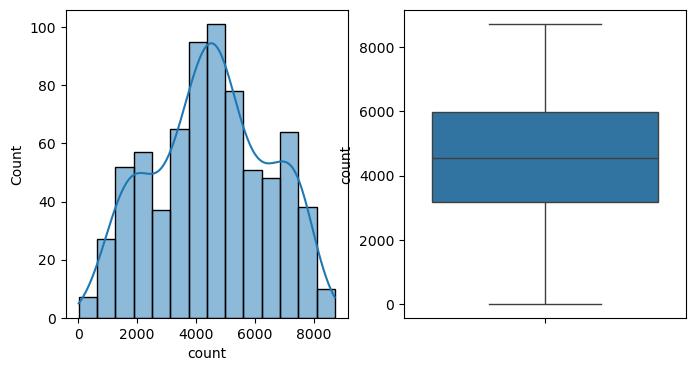

In [1132]:
# Visualising the target / dependant variable:
plt.figure(figsize=(8, 4))

plt.subplot(1,2,1)
sns.histplot(data=day_df, x=target_col, kde=True)

plt.subplot(1,2,2)
sns.boxplot(data=day_df, y=target_col)

In [1134]:
day_df['count'].describe()

count     730.000000
mean     4508.006849
std      1936.011647
min        22.000000
25%      3169.750000
50%      4548.500000
75%      5966.000000
max      8714.000000
Name: count, dtype: float64

<b>The plot seems to be a normal distribution. The mean and median are almost equal. Now, We can go ahead with further analysis.</b>

# Bivariate Analysis

### Categorical variables Analysis

#### From Data Dictionary, we can notice few overlapping columns such as season and month:
    - season : season (1:spring, 2:summer, 3:fall, 4:winter)
    - mnth : month ( 1 to 12)
#### And another set of overlapping columns are holiday, weekday and workingday:
    - holiday : weather day is a holiday or not 
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.

<Axes: >

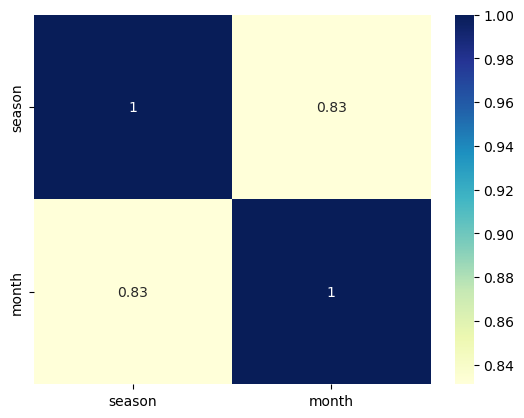

In [1140]:
# Lets check the corelation between the first overlapping variables set
sns.heatmap((day_df[['season','month']]).corr(), annot = True, cmap="YlGnBu")

In [1274]:
# Lets create a new column as weekend from weekday column for values corresponding to Saturday(5) and Sunday(6)
day_df['weekend'] = day_df['weekday'].isin([5, 6])
day_df.tail()

,season,year,month,holiday,weekday,workingday,weather,temperature,atemp,humidity,windspeed,count,weekend
725,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114,False
726,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095,True
727,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341,True
728,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796,False
729,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,2729,False


In [1276]:
# separate columns into categoricals and numericals
cat_cols=['year','month','season','weekday','weekend','holiday','workingday','weather']
num_cols=['temperature', 'atemp', 'humidity','windspeed']
target_col='count'

In [1278]:
# mapping the categorical variables to their values given in data dictionary

day_df['season'] = day_df['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})
day_df['year'] = day_df['year'].map({0:'2018',1:'2019'})
day_df['month'] = day_df['month'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'})
day_df['holiday'] = day_df['holiday'].map({0:'No',1:'Yes'})
day_df['weekday'] = day_df['weekday'].map({0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thurs', 4: 'Fri', 5: 'Sat', 6: 'Sun' })
day_df['workingday'] = day_df['workingday'].map({0:'No',1:'Yes'})
day_df['weather'] = day_df['weather'].map({1:'Clear',2:'Cloudy',3:'Bad',4:'Severe'})

# Recheck the dataframe
day_df.head()

,season,year,month,holiday,weekday,workingday,weather,temperature,atemp,humidity,windspeed,count,weekend
0,spring,2018,Jan,No,Sun,No,Cloudy,14.110847,18.18125,80.5833,10.749882,985,True
1,spring,2018,Jan,No,Mon,No,Cloudy,14.902598,17.68695,69.6087,16.652113,801,False
2,spring,2018,Jan,No,Tues,Yes,Clear,8.050924,9.47025,43.7273,16.636703,1349,False
3,spring,2018,Jan,No,Wed,Yes,Clear,8.200000,10.60610,59.0435,10.739832,1562,False
4,spring,2018,Jan,No,Thurs,Yes,Clear,9.305237,11.46350,43.6957,12.522300,1600,False


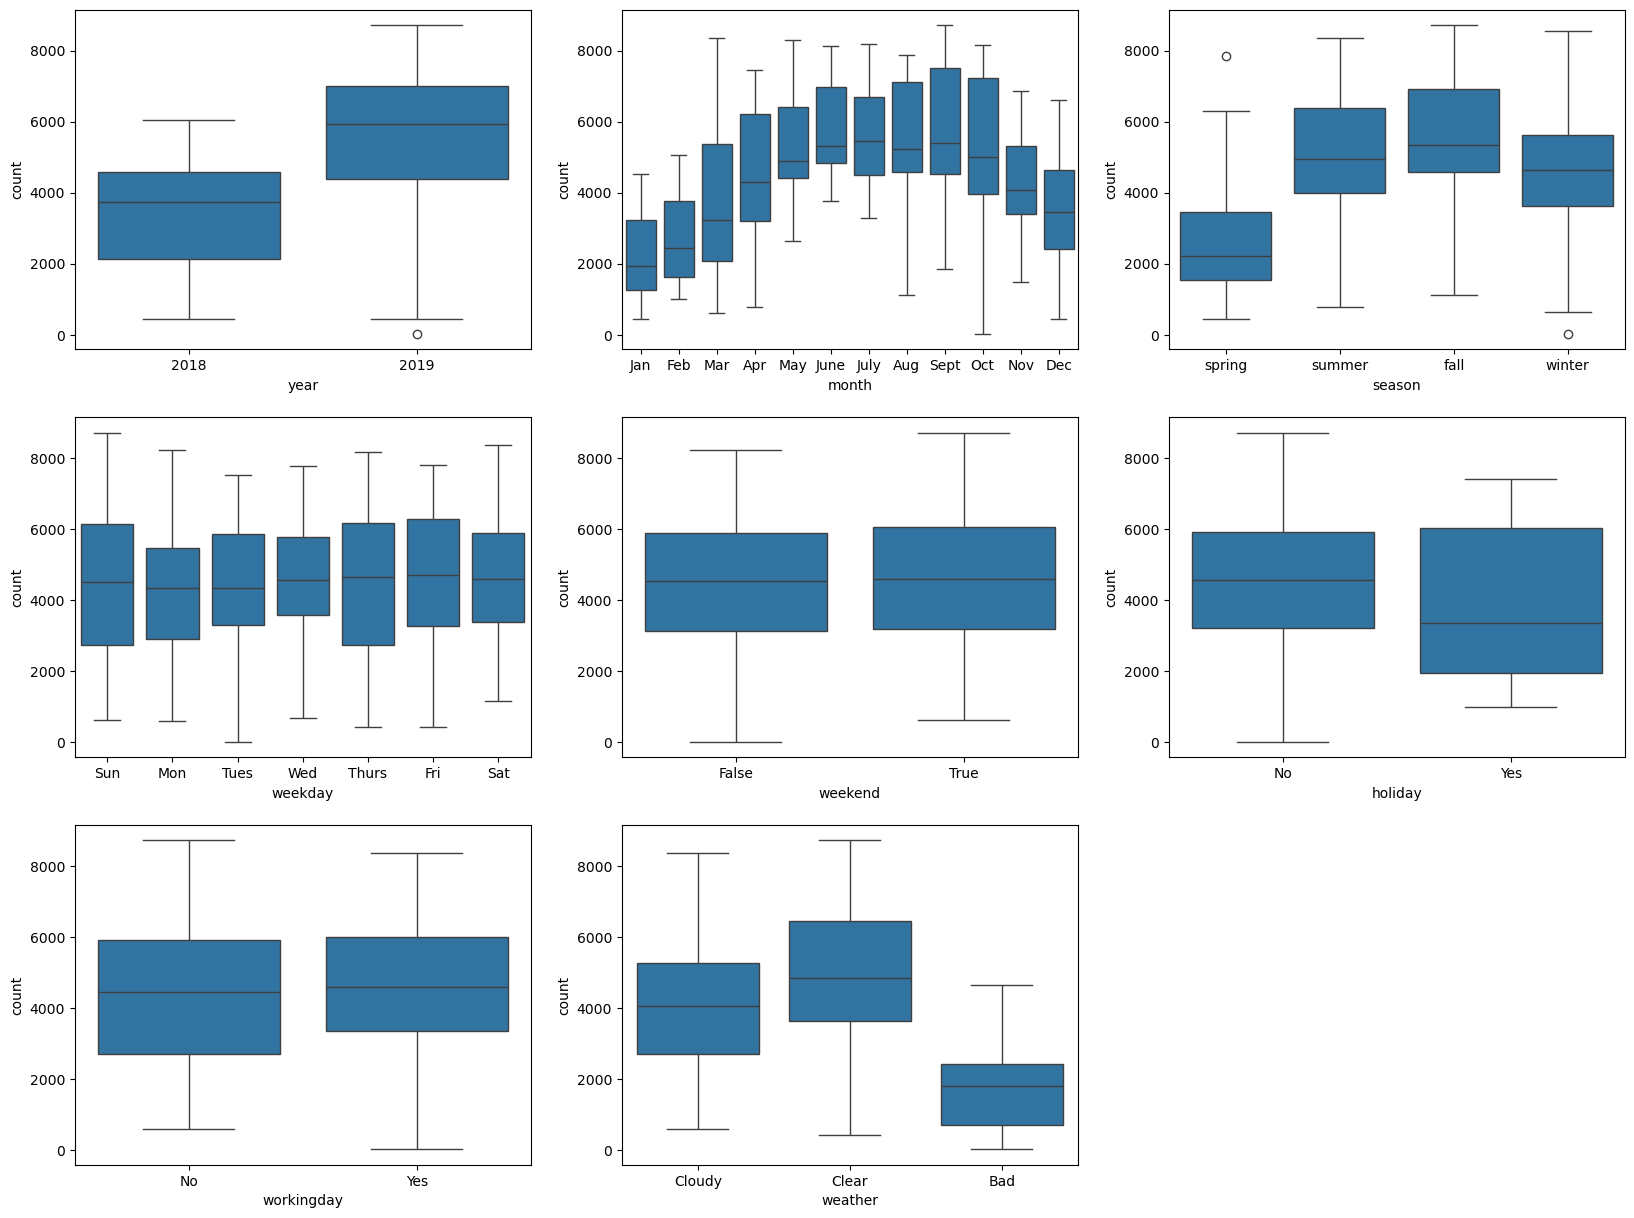

In [1148]:
# Visualising Categorical Variables : 
# 1. Using a boxplot between target variable and categorical variables

plt.figure(figsize=(20, 15))
i = 1
for col in cat_cols:
    plt.subplot(3,3,i)
    sns.boxplot(x=col, y=target_col, data=day_df)
    i+=1

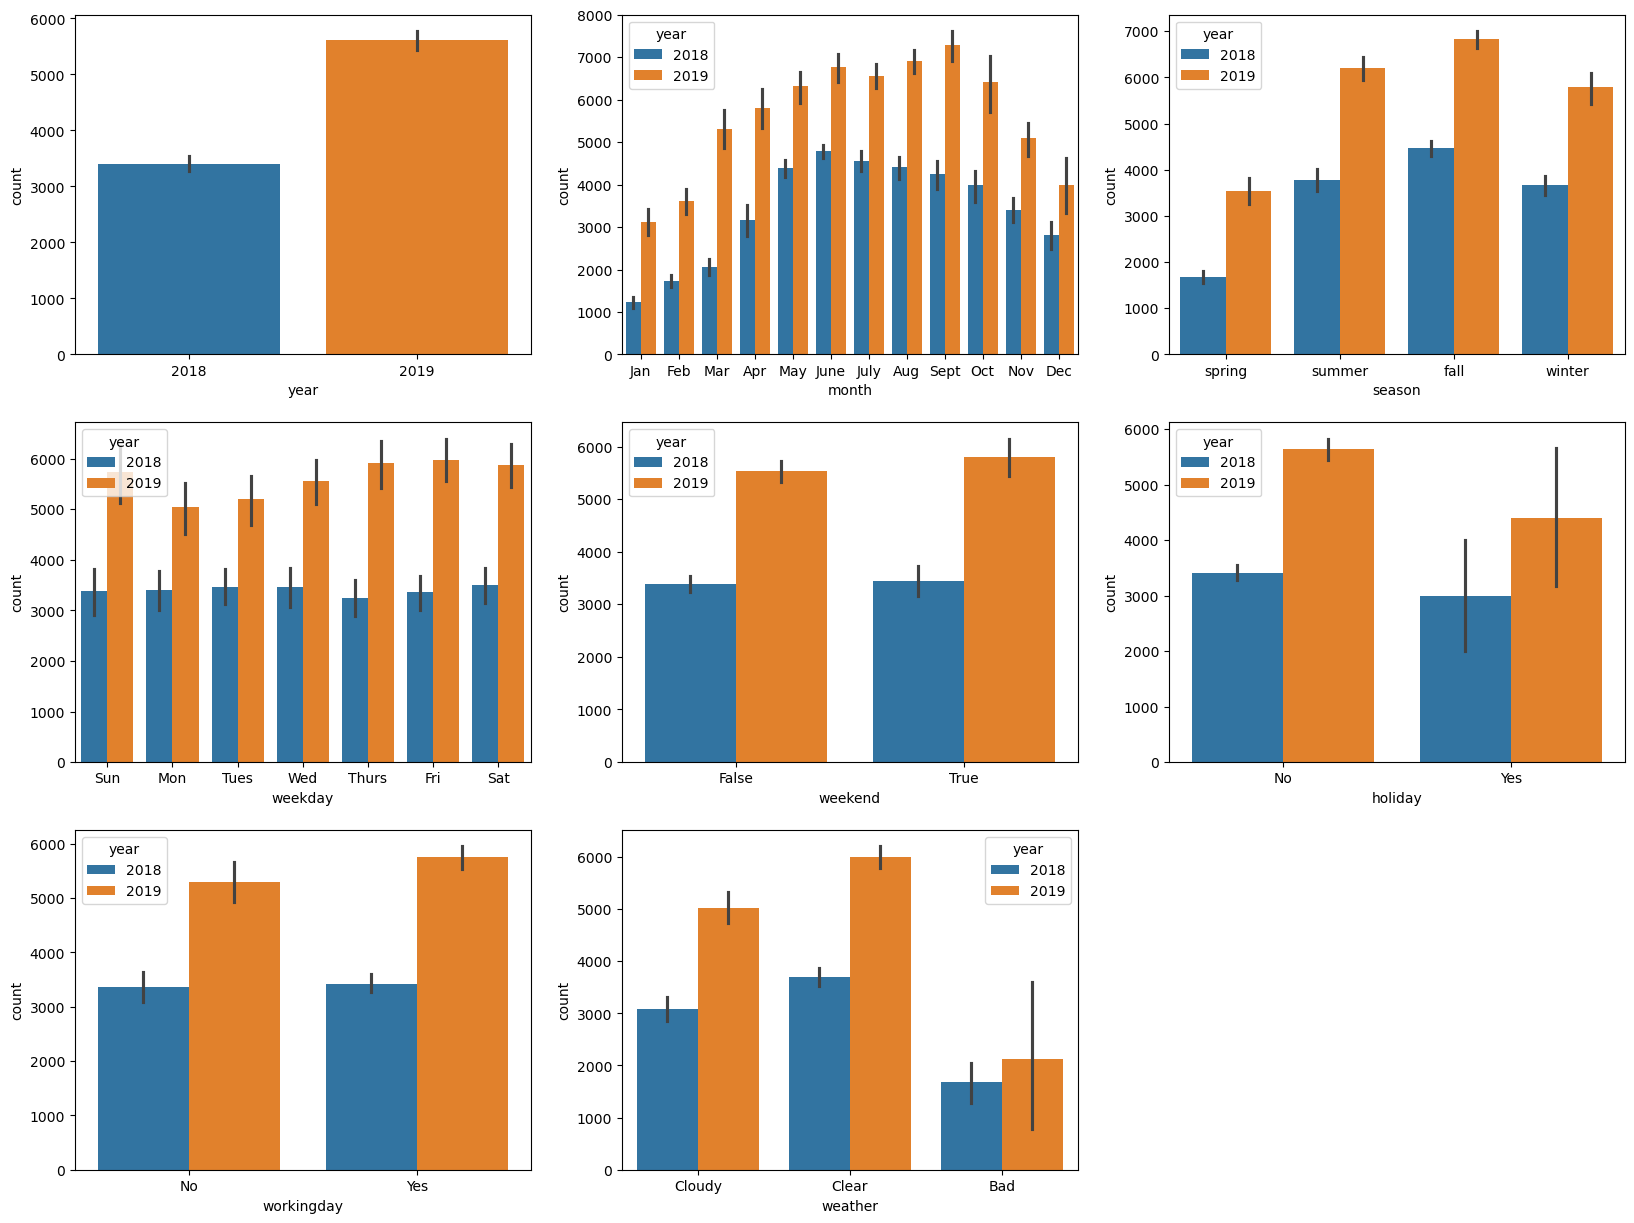

In [1150]:
# 2. Using a barplot between target variable and categorical variables by year

plt.figure(figsize=(20, 15))   
i = 1
for col in cat_cols:
    plt.subplot(3,3,i)
    sns.barplot(x=col, y=target_col, data=day_df, hue='year')
    i+=1

Analysis of Over-lapping categorical variables:

Month and Season: The demand increases during summer and goes to peak during fall season and then starts decreasing during winter and least during Spring season, this same curve we can notice for Month variable as well, where the demand curve increases March onwards (i.e Summer season) then reaches peak during September (i.e Fall season), then starts decreasing during December (i.e Winter season) and is least during Jan and Feb(i.e Spring season). The corelation coefficient(0.83) is also too high, so we can drop one of them.

Workingday vs Holiday + Weekend: As workingday states ~(weekend|holiday) and our data set already contains holiday column and weekend information in weekday column for values corresponding to Saturday(5) and Sunday(6) which means Workingday and weekend columns are holding redundant information, hence can be dropped.

In [1282]:
# Dropping workingday and weekend columns from dataset
cat_cols.remove('workingday')
cat_cols.remove('weekend')
cat_cols.remove('season')
day_df.drop(['workingday','weekend','season'],axis="columns",inplace=True)
day_df.head()

,year,month,holiday,weekday,weather,temperature,humidity,windspeed,count
0,2018,Jan,No,Sun,Cloudy,14.110847,80.5833,10.749882,985
1,2018,Jan,No,Mon,Cloudy,14.902598,69.6087,16.652113,801
2,2018,Jan,No,Tues,Clear,8.050924,43.7273,16.636703,1349
3,2018,Jan,No,Wed,Clear,8.200000,59.0435,10.739832,1562
4,2018,Jan,No,Thurs,Clear,9.305237,43.6957,12.522300,1600


### Numeric Variables Analysis

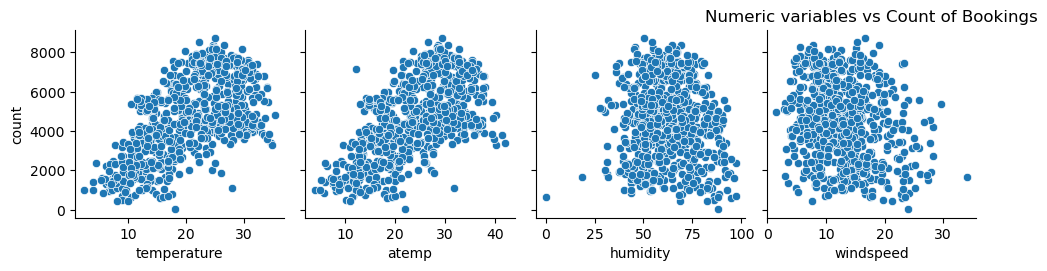

In [1154]:
# Visualising Numeric Variables : Using a pairplot

sns.pairplot(data=day_df, x_vars=num_cols ,y_vars=target_col)
plt.title('Numeric variables vs Count of Bookings')
plt.show()

In [1156]:
day_df.describe()

,temperature,atemp,humidity,windspeed,count
count,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,4508.006849
std,7.506729,8.150308,14.237589,5.195841,1936.011647
min,2.424346,3.953480,0.000000,1.500244,22.000000
25%,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,5966.000000
max,35.328347,42.044800,97.250000,34.000021,8714.000000


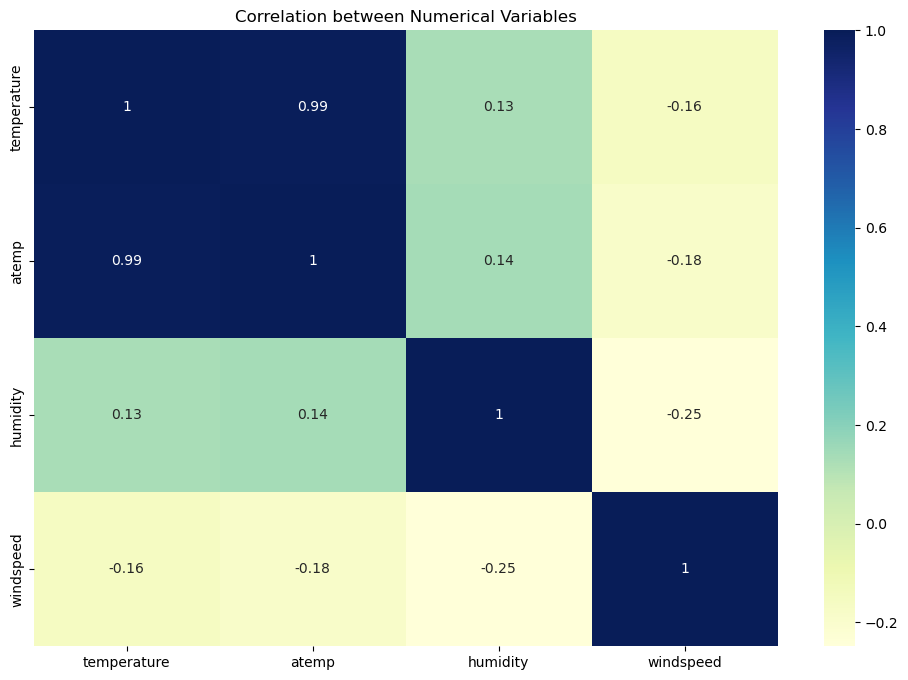

In [1158]:
# Check the correlation coefficients of numerical independent variables to see if they are highly correlated
plt.figure(figsize = (12, 8))
sns.heatmap(day_df[num_cols].corr(), annot = True, cmap="YlGnBu")
plt.title("Correlation between Numerical Variables")
plt.show()

From the above analysis, we can clearly see a very strong correlation between 2 of the independent variables: temp and atemp.
From data disctionary:
- temp : temperature in Celsius
- atemp: This column states feeling temperature in Celsius.

As temp column is already present and conveying the same information, atemp seems redundant information. And the correlation is 0.99 which is very high. So we can drop the atemp column to avoid multicolinearity.

In [1280]:
# Dropping atemp from data set and num_cols
day_df.drop(['atemp'],axis="columns",inplace=True)
num_cols.remove('atemp')
# Check dataframe
day_df.head()

,season,year,month,holiday,weekday,workingday,weather,temperature,humidity,windspeed,count,weekend
0,spring,2018,Jan,No,Sun,No,Cloudy,14.110847,80.5833,10.749882,985,True
1,spring,2018,Jan,No,Mon,No,Cloudy,14.902598,69.6087,16.652113,801,False
2,spring,2018,Jan,No,Tues,Yes,Clear,8.050924,43.7273,16.636703,1349,False
3,spring,2018,Jan,No,Wed,Yes,Clear,8.200000,59.0435,10.739832,1562,False
4,spring,2018,Jan,No,Thurs,Yes,Clear,9.305237,43.6957,12.522300,1600,False


### Insights
- Season: Fall' has the highest median, which shows that the demand was highest during 'Fall' and least during 'Spring' season.
- Year: The year 2019 had a higher count of users as compared to the year 2018.
- Weekday: The count of rentals is almost even throughout the week as the median is almost same for year 2018 but in 2019 we can see the rentals increased for Thurday to sunday.
- Season: There are no users when there is heavy rain/snow indicating that this weather is quite adverse. Highest count was seen when the weather situation was Clear, and then Partly Cloudy.
- Month: The number of rentals peaked in September and least during Dec-Mar. This observation is consistent with the observations made regarding the weather. As a result of the typical substantial snowfall, rentals may have declined.
- Holiday: The count of users is less during the holidays.
- Workingday: we can see those maximum bookings happening between 4000 and 6000, that is the median and high quantile count of users is constant almost throughout the week but a difference in low quantile during working day.
- Weekend: we can see the booking across the 5 weekdays(not weekend data) are almost same with the 2 days of weekend.

# Data Preparation

### Create Dummies

In [1284]:
# creating dummy variables for categorical features.
day_df = pd.get_dummies(data=day_df,columns=cat_cols,drop_first=True, dtype=int) 
day_df.head()

,temperature,humidity,windspeed,count,year_2019,month_Aug,month_Dec,month_Feb,month_Jan,month_July,...,month_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,holiday_Yes,weather_Clear,weather_Cloudy
0,14.110847,80.5833,10.749882,985,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,14.902598,69.6087,16.652113,801,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
2,8.050924,43.7273,16.636703,1349,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
3,8.200000,59.0435,10.739832,1562,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
4,9.305237,43.6957,12.522300,1600,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [1166]:
# Check the column names
day_df.columns

Index(['temperature', 'humidity', 'windspeed', 'count', 'year_2019',
       'month_Aug', 'month_Dec', 'month_Feb', 'month_Jan', 'month_July',
       'month_June', 'month_Mar', 'month_May', 'month_Nov', 'month_Oct',
       'month_Sept', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thurs', 'weekday_Tues', 'weekday_Wed', 'holiday_Yes',
       'weather_Clear', 'weather_Cloudy'],
      dtype='object')

In [1168]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   temperature     730 non-null    float64
 1   humidity        730 non-null    float64
 2   windspeed       730 non-null    float64
 3   count           730 non-null    int64  
 4   year_2019       730 non-null    int64  
 5   month_Aug       730 non-null    int64  
 6   month_Dec       730 non-null    int64  
 7   month_Feb       730 non-null    int64  
 8   month_Jan       730 non-null    int64  
 9   month_July      730 non-null    int64  
 10  month_June      730 non-null    int64  
 11  month_Mar       730 non-null    int64  
 12  month_May       730 non-null    int64  
 13  month_Nov       730 non-null    int64  
 14  month_Oct       730 non-null    int64  
 15  month_Sept      730 non-null    int64  
 16  weekday_Mon     730 non-null    int64  
 17  weekday_Sat     730 non-null    int

# Model Building

### Split train test

In [1286]:
# Splitting the Data into Training and Testing Sets
train_df, test_df = train_test_split(day_df, train_size = 0.7, random_state = 100)

# print the shape of training and testing dataset
print(train_df.shape)
print(test_df.shape)

(510, 25)
(220, 25)


### Rescaling

In [1288]:
# scaling the numerical independent variables with min max scaler.
scaler = MinMaxScaler()
train_df[num_cols] = scaler.fit_transform(train_df[num_cols])
train_df.head()

,temperature,humidity,windspeed,count,year_2019,month_Aug,month_Dec,month_Feb,month_Jan,month_July,...,month_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,holiday_Yes,weather_Clear,weather_Cloudy
576,0.815169,0.725633,0.264686,7216,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
426,0.442393,0.640189,0.255342,4066,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
728,0.245101,0.498067,0.663106,1796,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
482,0.395666,0.504508,0.188475,4220,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
111,0.345824,0.751824,0.380981,1683,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [1174]:
# checking description after scaling.
train_df.describe()

,temperature,humidity,windspeed,count,year_2019,month_Aug,month_Dec,month_Feb,month_Jan,month_July,...,month_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,holiday_Yes,weather_Clear,weather_Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.650480,0.320883,4485.337255,0.507843,0.096078,0.084314,0.066667,0.088235,0.076471,...,0.080392,0.143137,0.127451,0.154902,0.158824,0.150980,0.131373,0.025490,0.625490,0.345098
std,0.225858,0.145846,0.169803,1950.666077,0.500429,0.294988,0.278131,0.249689,0.283915,0.266010,...,0.272166,0.350557,0.333805,0.362166,0.365870,0.358381,0.338139,0.157763,0.484471,0.475867
min,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,3120.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.542596,0.653714,0.296763,4530.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.735215,0.754830,0.414447,5973.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Check correlation

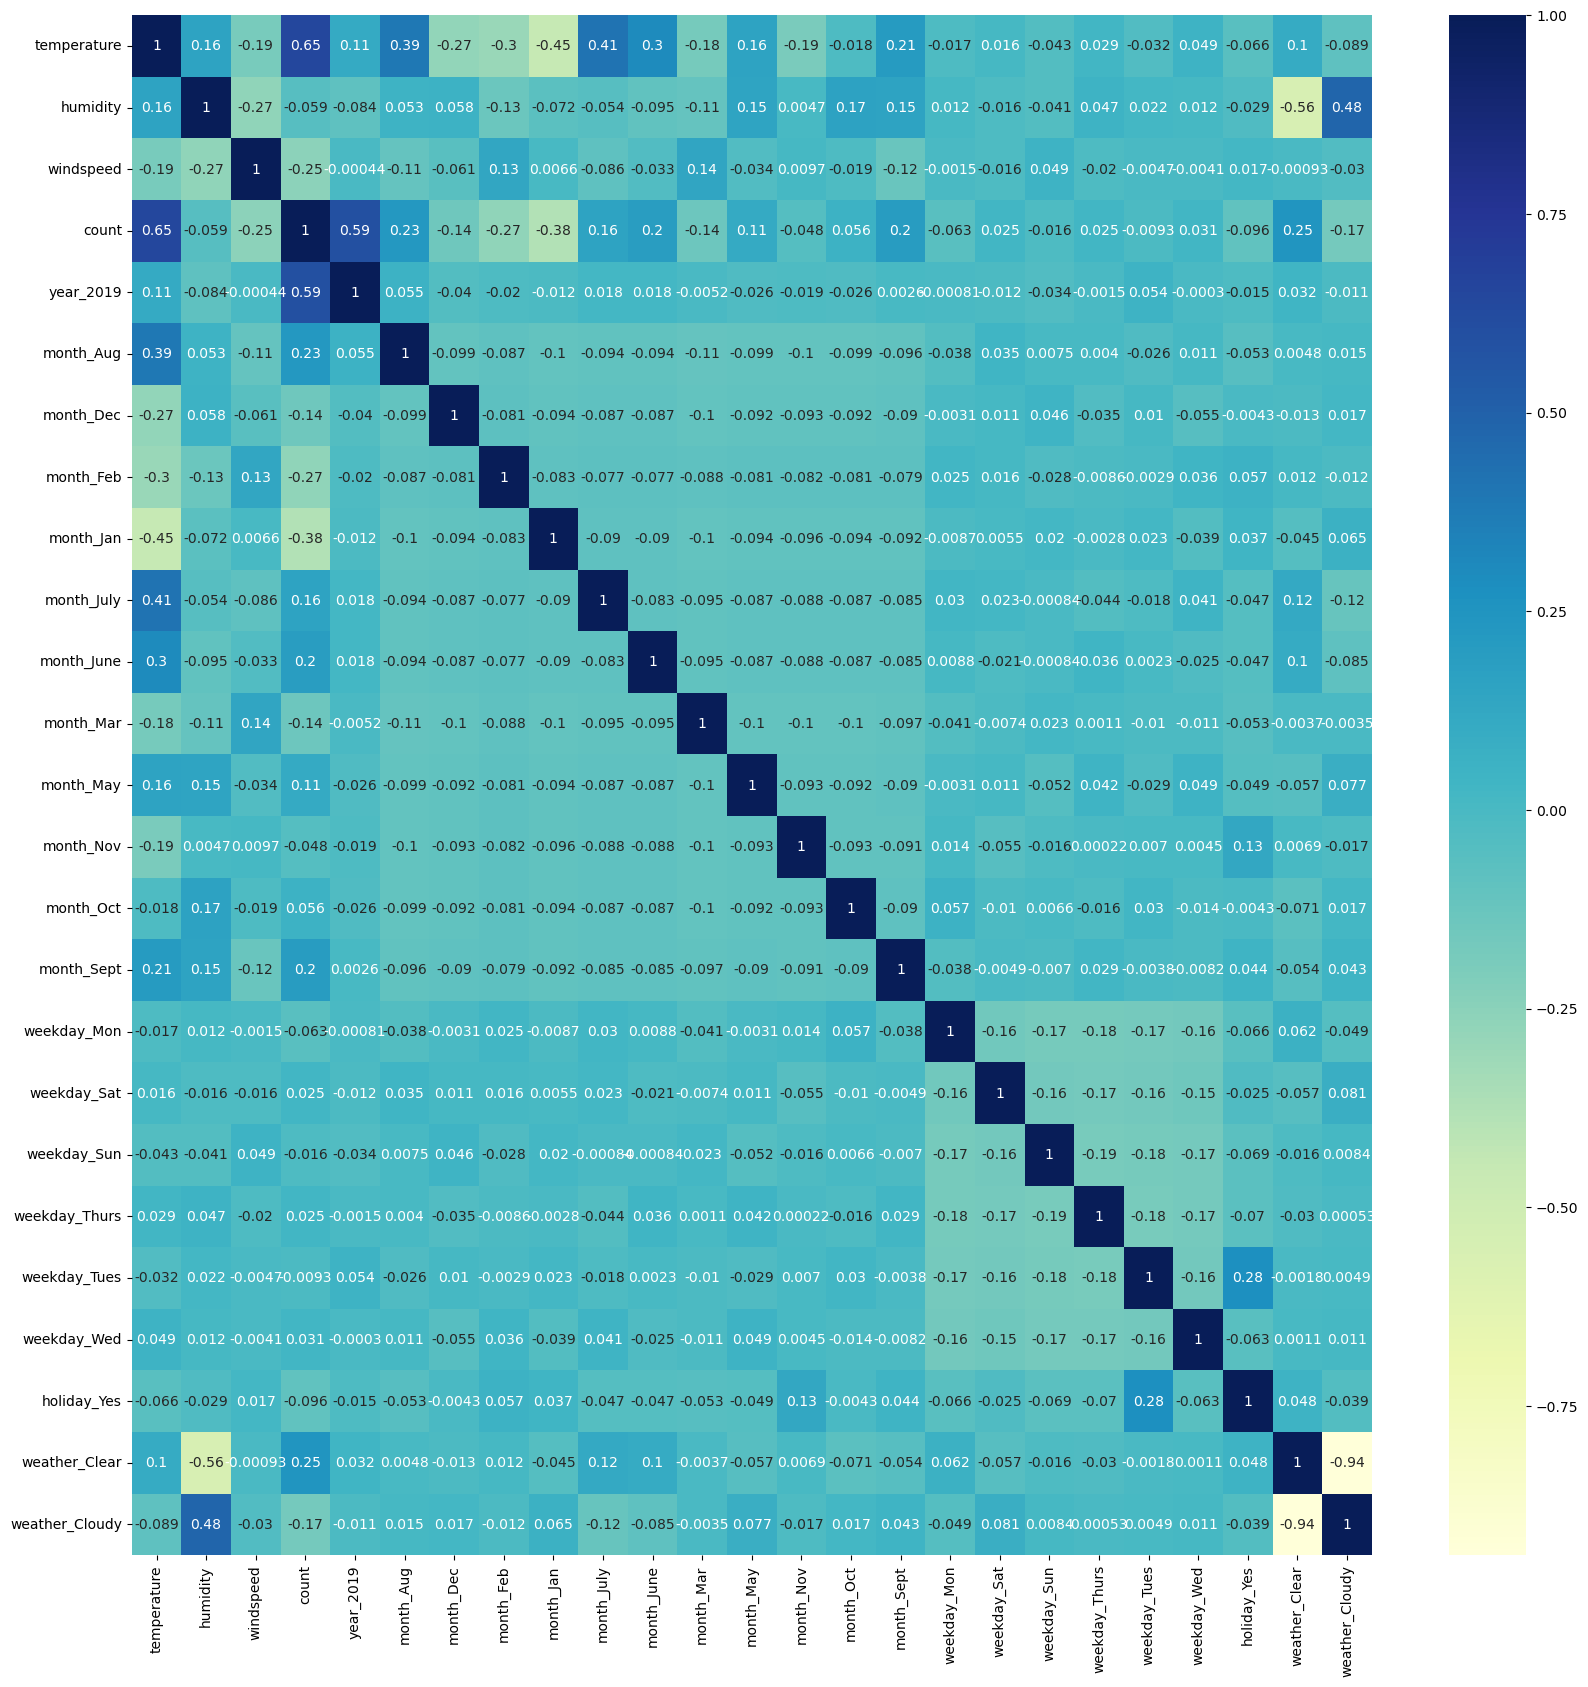

In [1176]:
# check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (20, 20))
sns.heatmap(train_df.corr(), annot = True, cmap="YlGnBu")
plt.show()

<b> From this we can say that, temperature seems correlated with count the most(0.65). Let's check a regression plot for temperature vs count.</b>

### Regression Plot

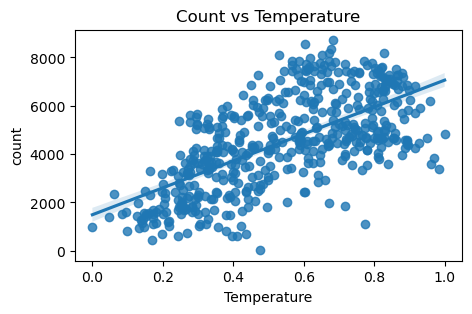

In [1178]:
plt.figure(figsize=(5,3))
plt.title("Count vs Temperature")
sns.regplot(data=train_df,x="temperature",y="count")
plt.xlabel("Temperature")
plt.show()

<b> From the regression plot, we can clearly see that count and temperature are having positive correlation.</b>

## Feature Selection using RFE (Recursive feature elimination)

In [1180]:
# generating x and y train datasets
y_train = train_df.pop("count")
X_train = train_df

In [1182]:
# using rfe to select some features from the model.
lr = LinearRegression()
rfe = RFE(lr, n_features_to_select=15).fit(X_train, y_train)
# listing all the features after rfe.
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temperature', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('year_2019', True, 1),
 ('month_Aug', False, 4),
 ('month_Dec', False, 3),
 ('month_Feb', True, 1),
 ('month_Jan', True, 1),
 ('month_July', True, 1),
 ('month_June', False, 7),
 ('month_Mar', True, 1),
 ('month_May', False, 2),
 ('month_Nov', True, 1),
 ('month_Oct', True, 1),
 ('month_Sept', True, 1),
 ('weekday_Mon', True, 1),
 ('weekday_Sat', False, 9),
 ('weekday_Sun', False, 8),
 ('weekday_Thurs', False, 10),
 ('weekday_Tues', False, 5),
 ('weekday_Wed', False, 6),
 ('holiday_Yes', True, 1),
 ('weather_Clear', True, 1),
 ('weather_Cloudy', True, 1)]

In [1184]:
# printing and saving selected columns after RFE.
selected_columns = X_train.columns[rfe.support_]
selected_columns

Index(['temperature', 'humidity', 'windspeed', 'year_2019', 'month_Feb',
       'month_Jan', 'month_July', 'month_Mar', 'month_Nov', 'month_Oct',
       'month_Sept', 'weekday_Mon', 'holiday_Yes', 'weather_Clear',
       'weather_Cloudy'],
      dtype='object')

### Building model using statsmodel 

In [1186]:
#Function to build a model using statsmodel api
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [1188]:
# Function to calculate VIF of variables
def calculate_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

## Backward Feature Elimination
### Model 1

In [1190]:
# generating the first model with all columns selected by RFE
build_model(selected_columns)
calculate_vif(selected_columns)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     165.4
Date:                Fri, 20 Dec 2024   Prob (F-statistic):          1.57e-181
Time:                        11:28:53   Log-Likelihood:                -4129.0
No. Observations:                 510   AIC:                             8290.
Df Residuals:                     494   BIC:                             8358.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            933.3068    401.551      2.

In [1194]:
# drop high vif value(18.94 > 5) and low p-val first - humidity
selected_columns = selected_columns.drop(['humidity'])
selected_columns

Index(['temperature', 'windspeed', 'year_2019', 'month_Feb', 'month_Jan',
       'month_July', 'month_Mar', 'month_Nov', 'month_Oct', 'month_Sept',
       'weekday_Mon', 'holiday_Yes', 'weather_Clear', 'weather_Cloudy'],
      dtype='object')

### Model 2

In [1196]:
# generating the second model after removing humidity 
build_model(selected_columns)
# calculate VIF for the new model
calculate_vif(selected_columns)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     172.0
Date:                Fri, 20 Dec 2024   Prob (F-statistic):          8.12e-180
Time:                        11:30:27   Log-Likelihood:                -4135.8
No. Observations:                 510   AIC:                             8302.
Df Residuals:                     495   BIC:                             8365.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -117.6982    283.345     -0.

In [1198]:
# As month_Nov shows low VIF(1.30) and high p-value(0.076) hence we can drop it - month_Nov
selected_columns = selected_columns.drop(['month_Nov'])
selected_columns

Index(['temperature', 'windspeed', 'year_2019', 'month_Feb', 'month_Jan',
       'month_July', 'month_Mar', 'month_Oct', 'month_Sept', 'weekday_Mon',
       'holiday_Yes', 'weather_Clear', 'weather_Cloudy'],
      dtype='object')

### Model 3

In [1200]:
# generating the third model after removing month_Nov 
build_model(selected_columns)
# calculate VIF for the new model
calculate_vif(selected_columns)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     184.2
Date:                Fri, 20 Dec 2024   Prob (F-statistic):          2.81e-180
Time:                        11:31:42   Log-Likelihood:                -4137.4
No. Observations:                 510   AIC:                             8303.
Df Residuals:                     496   BIC:                             8362.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             38.4343    269.959      0.

In [1202]:
# Both temperature and weather_Clear shows high VIF values, but as temp has high corelation with count, lets remove weather_Clear and test
selected_columns = selected_columns.drop(['weather_Clear'])
selected_columns

Index(['temperature', 'windspeed', 'year_2019', 'month_Feb', 'month_Jan',
       'month_July', 'month_Mar', 'month_Oct', 'month_Sept', 'weekday_Mon',
       'holiday_Yes', 'weather_Cloudy'],
      dtype='object')

### Model 4

In [1204]:
# generating the forth model after removing weather_Clear 
build_model(selected_columns)
# calculate VIF for the new model
calculate_vif(selected_columns)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     149.7
Date:                Fri, 20 Dec 2024   Prob (F-statistic):          2.24e-156
Time:                        11:33:34   Log-Likelihood:                -4196.9
No. Observations:                 510   AIC:                             8420.
Df Residuals:                     497   BIC:                             8475.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2421.6977    192.183     12.

<b>Now we can see all features have p-value less than 0.05 and VIF value less than 5. So we can consider this as our final model.</b>

In [1027]:
# Final model has below columns selected
selected_columns 

Index(['temperature', 'windspeed', 'year_2019', 'month_Feb', 'month_Jan',
       'month_July', 'month_Mar', 'month_Oct', 'month_Sept', 'weekday_Mon',
       'holiday_Yes', 'weather_Cloudy'],
      dtype='object')

In [1029]:
# Build x-train with only the selected columns
X_train = X_train[selected_columns]
X_train.shape

(510, 12)

In [1031]:
# creating the final linear regression model with sklearn. 
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.intercept_,lr.coef_)

2421.69771102073 [ 3732.2329021  -1672.06114177  2102.99562642  -999.75202948
 -1253.66708493  -610.36490155  -459.39339271   310.75538642
   446.55307546  -363.14433728  -771.4403743   -565.46490616]


# Residual Analysis

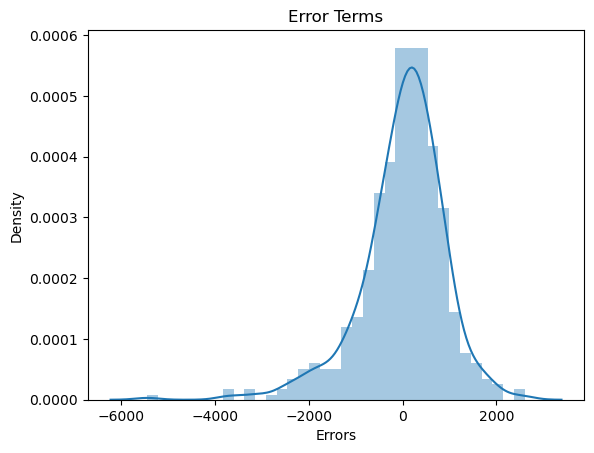

In [1033]:
# predicting the y train values with x train 
y_train_pred = lr.predict(X_train)
# find residual by difference between the actual and predicted value of y-train
res = y_train - y_train_pred

# checking normality of error terms
sns.distplot(res)
plt.title('Error Terms')
plt.xlabel('Errors')
plt.show()

<b> Error terms are normally distributed. This is in accordance with the stated assumptions of linear regression. </b>

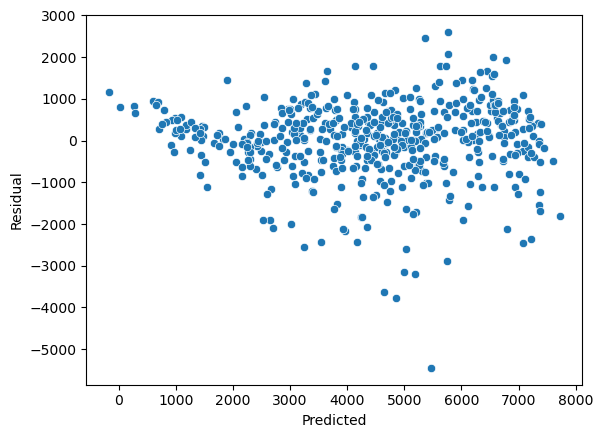

In [1035]:
# Idenpendence check (Error term should be independent of each other and there should be no visible pattern.)
sns.scatterplot(x=y_train_pred,y=res)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.show()

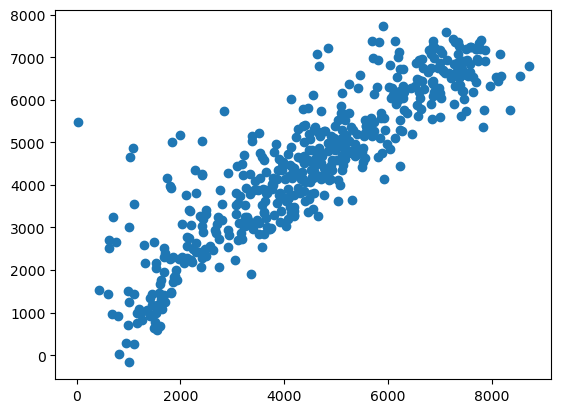

In [1051]:
# Homoscedasticity check (Constant variance)
plt.scatter(y_train,y_train_pred)
plt.show()

<b> There is no visible pattern in residual values and has constant variance. </b>

# Model Predictions

In [1053]:
# R-squared Value y train and predicted data sets.
r2_score(y_train,y_train_pred)

0.7833116975657224

In [1055]:
# Transforming numeric variables of test data (for test data- only transform is required and not fit).
test_df[num_cols] = scaler.transform(test_df[num_cols])
test_df.head()

,temperature,humidity,windspeed,count,year_2019,month_Aug,month_Dec,month_Feb,month_Jan,month_July,...,month_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,holiday_Yes,weather_Clear,weather_Cloudy
184,0.831783,0.657364,0.084219,6043,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,1
535,0.901354,0.610133,0.153728,6211,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0.511964,0.837699,0.334206,2659,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
221,0.881625,0.437098,0.339570,4780,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
152,0.817246,0.314298,0.537414,4968,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [1057]:
# generating x and y test datasets
y_test = test_df.pop("count")
X_test = test_df

# Build x-test with only the selected columns
X_test = X_test[selected_columns]
X_test.shape

(220, 12)

In [1059]:
# Predicting test data values
y_test_pred = lr.predict(X_test)

# R-squared value between y test and predicted data sets. 
y_pred=y_test_pred
r2_score(y_test,y_pred)

0.7476531166764153

# Model Evaluation:

In [1061]:
# Model evaluation based on r2_score
print('r2_score of train dataset', r2_score(y_train, y_train_pred))
print('r2_score of test dataset', r2_score(y_test, y_test_pred))

r2_score of train dataset 0.7833116975657224
r2_score of test dataset 0.7476531166764153


In [1063]:
# checking the mean squared error for both training and testing dataset.
print('Train mean squared error: ',mean_squared_error(y_true=y_train,y_pred=y_train_pred))
print('Test mean squared error: ',mean_squared_error(y_true=y_test,y_pred=y_test_pred))

Train mean squared error:  822903.5513278666
Test mean squared error:  911580.437169729


<b> We can see that the r_squared on the test set and the trained set are quiet reasonable and nearly equal, which means that whatever data the model was trained with, it has been almost able to apply those learnings in the test data. </b>

Text(0, 0.5, 'y_pred')

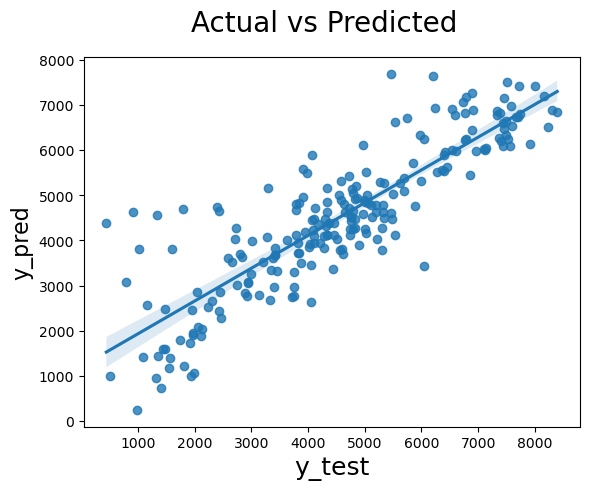

In [1065]:
# Plotting the graph for actual versus predicted values to understand the spread.

fig = plt.figure()
sns.regplot(x=y_test,y=y_test_pred,fit_reg=True)
fig.suptitle('Actual vs Predicted', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16)

We can colude that the final model fit isn't by chance, and has descent predictive power.

# Conclusion

Let's analyse Final Model's params and coefficients to understand their positive/negative correlation with target variable: <br>

Year:<br>
- year_2019     :    2102.9956

Weather Conditions:<br>  
- temperature      :   3732.2329
- weather_Cloudy   :   -565.4649
- windspeed      :    -1672.0611

Days:<br> 
- holiday_Yes    :    -771.4404
- weekday_Mon    :    -363.1443

Months and season:<br> 
- month_July :   -610.3649
- month_Sept  :   446.5531
- month_Oct  :   310.7554      
- month_Jan  :   -1253.6671    
- month_Feb :   -999.7520

- The close alignment of R2 score between the training and test sets (0.78 vs 0.75) in a linear regression model indicates effective generalization. This similarity suggests the model avoids overfitting to the training data and is likely to perform consistently on new, unseen data.
- The RMSE values of 822903 in the training set and 911580 in the test set for a linear regression model indicate that the model is fitting well to the training data and generalizing reasonably to new, unseen data with a small difference between training and test set performance.

Significant variables to predict the demand for shared bikes:
- Year 2019 has higher bookings compared to year 2018, means the bookings are increasing year on year and company can predict higher booking for upcoming year.
- The demand also increases with temperature (clear weather) and decreases for cloudy weather and highly decrease for bad weather condition with high windspeed, hence it should keep track of the weather conditions.
- Holiday time has least bookings whereas most working days and even weekends has a positive demand. Suprisingly, Mondays have less bookings which could be because of hybrid work culture where most companies are work from home on Mondays.
- The month September and october (Fall season) should be considered by the company as they have a higher demand, this could be because of mostly clear weather condition. And Month January and February (Winter season) has negative impact on bookings which could be due to the severe weather conditions like snow and low temperature. Also July has less bookings which could be due to rainfall and cloudy weather condition.
